## Importing libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import nltk
#nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS

In [ ]:
cd C:\Users\khadija bouagoun\Desktop\files\my_pro\web scraping\times jobs

C:\Users\khadija bouagoun\Desktop\files\my_pro\web scraping\times jobs


## Downloading the Dataset

In [2]:
df = pd.read_csv('data_science.csv')
df.head()

,Unnamed: 0,Job info,Skills,location
0,0,['Job Function: IT Software : Software Product...,"['data analysis ', 'sql ', 'data science ', 'a...",Bengaluru/ Bangalore (Karnataka)
1,1,['Job Function: IT Software : Software Product...,"['data analysis ', 'sql ', 'data science ', 'a...",Bengaluru/ Bangalore (Karnataka)
2,2,['Job Function: IT Software : Software Product...,"['advanced analytics ', 'data analytics ', 'sa...",Bengaluru/ Bangalore (Karnataka)
3,3,['Job Function: IT Software : Software Product...,"['sql ', 'data science ', 'use cases ', 'data ...","Mumbai (Maharashtra), Chennai (Tamil Nadu), Pu..."
4,4,['Job Function: IT Software : Software Product...,"['data mining ', 'api ', 'machine learning ']",Bengaluru/ Bangalore (Karnataka)


In [3]:
df.shape

(2475, 4)

## Data Cleaning 

In [4]:
# delete the "Unnamed: 0" and "location" columns
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('location', axis = 1, inplace = True)

In [5]:
# examine what data to extract
df['Job info'][0]

"['Job Function: IT Software : Software Products & Services', 'Industry: Banking', 'Specialization:Data Warehousing', 'Qualification:                         Any Graduate', 'Any Graduate', 'Employment Type:               Full Time']"

In [6]:
# extract meaningful data from Job info column :

df['Job Function'] = [ job.split("', '")[0].split(':')[-1] for job in df['Job info'] ]
df['Industry'] = [ job.split("', '")[1].split(':')[-1]   for job in df['Job info']]
df['Specialization'] = [ job.split("', '")[2].split(':')[-1]   for job in df['Job info']]

emp = []
for job in df['Job info'] :
    if 'Employment Type' in job.split("', '")[-1] :
        emp.append(job.split("', '")[-1].split(':')[-1].strip().replace(']', ' ').replace("'",''))
    else :
        emp.append(job.split("', '")[-2].split(':')[-1].strip())
        
df['Employment Type'] = emp
df['Employment Type'].replace('Full Time ', 'Full Time', inplace = True) 
df['Employment Type'].replace('Part Time ', 'Part Time', inplace = True) 

# cleaning the "Skills" column :
df['Skills'] = [ elt.replace("'", '').replace('[','').replace(']','') for elt in df['Skills']]

In [7]:
# delete Job info column after extracting the four previous columns
df.drop('Job info', axis = 1, inplace = True)

In [8]:
# reorder the dataframe' columns
df = df[['Job Function', 'Specialization', 'Industry', 'Skills', 'Employment Type']]

df.sample(4)

,Job Function,Specialization,Industry,Skills,Employment Type
994,Software Products & Services,Data Warehousing,Healthcare,"business requirements , data analytics , custo...",Full Time
1490,Front Office Staff/Secretarial/Computer Operator,"Data entry,Front Office",Others - computer operation,computer operator,Part Time
1969,Sales/Business Development,"Channel Sales,Institutional Sales",Consumer Durables/FMCG,"Sales , communication, communication, marketin...",Full Time
1043,Software Products & Services,Business/Systems Analysis,"Retailing, Consumer Durables/FMCG","visualization , information technology , advan...",Full Time


In [9]:
# show jobs without precised skills with a NaN value
df.Skills.replace(np.nan, "NaN", inplace = True)

In [10]:
df.info() # no Nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Function     2475 non-null   object
 1   Specialization   2475 non-null   object
 2   Industry         2475 non-null   object
 3   Skills           2475 non-null   object
 4   Employment Type  2475 non-null   object
dtypes: object(5)
memory usage: 96.8+ KB


In [11]:
df.describe()

,Job Function,Specialization,Industry,Skills,Employment Type
count,2475,2475,2475,2475,2475
unique,92,402,148,1269,4
top,Software Products & Services,"Air Hostess,Cabin Crew,Ground Staff,Ticketing",Hotel/Travel/Tourism/Airlines/Hospitality,"Domestic Ticketing , Ticketing , Airport Handl...",Full Time
freq,1017,491,496,464,2309


## Data Analysis and Visualization :

## Top industries with more ads :

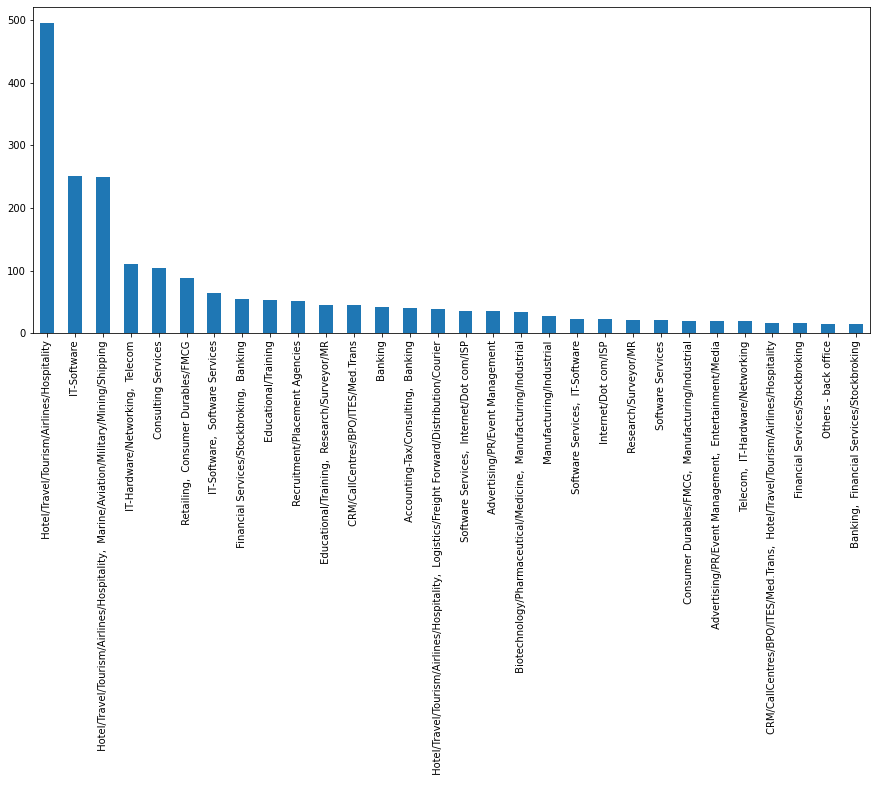

In [12]:
# show top 30 sectors which are more active in jobs' ads
plt.figure(figsize=(15,6))
df.Industry.value_counts().sort_values(ascending = False)[:30].plot.bar()

 ## Analysis of the number of ads per industry for some Specializations :

In [13]:
df.Specialization.value_counts().sort_values(ascending=False)[:10]

Air Hostess,Cabin Crew,Ground Staff,Ticketing                                         491
Business/Systems Analysis                                                             379
Software Engineer                                                                     200
Chartered Accountant/CPA,Company Secretary,Cost Accounting/ ICWA,Business Analysis    187
Database Administration (DBA)                                                          96
Data Warehousing                                                                       79
Administration                                                                         56
Application Programming                                                                45
Data entry,Front Office                                                                44
Profit Improvement,Research Associate,Agent,Business Development                       42
Name: Specialization, dtype: int64

In [14]:
analysis_data = df[(df.Specialization == 'Business/Systems Analysis') \
                   | (df.Specialization =='Chartered Accountant/CPA,Company Secretary,Cost Accounting/ ICWA,Business Analysis')]
warehousing_data = df[df.Specialization == 'Data Warehousing']

#### 1 - Number of Data Warehousing ads for each industry :

In [15]:
warehousing_data.sample(5)

,Job Function,Specialization,Industry,Skills,Employment Type
142,Software Products & Services,Data Warehousing,Software Services,"fundamentals , hive , information technology ,...",Full Time
95,Software Products & Services,Data Warehousing,"IT-Hardware/Networking, Telecom","data mining , bi , dashboards , sql , data sci...",Full Time
992,Software Products & Services,Data Warehousing,Consulting Services,"data analytics , big data analytics , data min...",Full Time
955,Software Products & Services,Data Warehousing,"IT-Hardware/Networking, Telecom","business requirements , ds , data science , us...",Full Time
1335,Software Products & Services,Data Warehousing,Consulting Services,"data analytics , big data analytics , bi , bus...",Full Time


In [16]:
warehousing_data.shape

(79, 5)

In [17]:
# which sectors need more data warehousing jobs
industries = warehousing_data.Industry.value_counts().sort_values(ascending = False) [:10]
industries

 Consulting Services                                      24
 IT-Hardware/Networking,  Telecom                         13
 Financial Services/Stockbroking,  Banking                 7
 Banking                                                   4
 Software Services                                         4
 Telecom,  IT-Hardware/Networking                          4
 Consumer Durables/FMCG,  Manufacturing/Industrial         3
 Retailing,  Consumer Durables/FMCG                        3
 Software Services,  IT-Software                           2
 Advertising/PR/Event Management,  Entertainment/Media     2
Name: Industry, dtype: int64

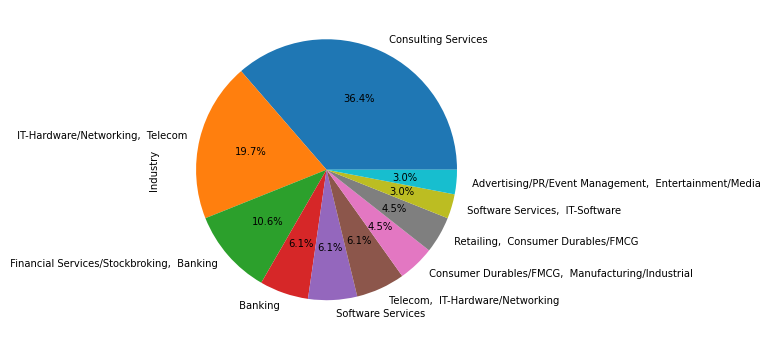

In [18]:
plt.figure(figsize=(6,6))
industries.plot.pie(autopct='%1.1f%%')

In [19]:
# type of employment in Consulting Services --> the industry with max of ads

warehousing_data[warehousing_data.Industry == ' Consulting Services']['Employment Type'].value_counts()

Full Time    24
Name: Employment Type, dtype: int64

#### 2 - Number of Data Analysis ads for each industry :

In [20]:
analysis_data.sample(5)

,Job Function,Specialization,Industry,Skills,Employment Type
1841,"Accounting/Tax/Company Secretary/Audit,Corpor...","Chartered Accountant/CPA,Company Secretary,Cos...","Hotel/Travel/Tourism/Airlines/Hospitality, M...","Data Entry , data entry operator , computer op...",Full Time
1061,Software Products & Services,Business/Systems Analysis,"Financial Services/Stockbroking, Banking","bi , data science , software engineering , dat...",Full Time
768,Software Products & Services,Business/Systems Analysis,Internet/Dot com/ISP,"business requirements , sql , data science , d...",Full Time
249,Software Products & Services,Business/Systems Analysis,"Educational/Training, Research/Surveyor/MR","data science , data scientist , statistical mo...",Full Time
771,Software Products & Services,Business/Systems Analysis,Insurance,"bi , data science , data analytics , user trai...",Full Time


In [21]:
analysis_data.shape

(566, 5)

In [22]:
# which sectors need more data analysis jobs
industries_anal = analysis_data.Industry.value_counts().sort_values(ascending = False) [:10]
industries_anal

 Hotel/Travel/Tourism/Airlines/Hospitality,  Marine/Aviation/Military/Mining/Shipping    187
 Retailing,  Consumer Durables/FMCG                                                       73
 Consulting Services                                                                      44
 IT-Software                                                                              43
 IT-Hardware/Networking,  Telecom                                                         35
 Educational/Training,  Research/Surveyor/MR                                              27
 Banking                                                                                  24
 Software Services,  Internet/Dot com/ISP                                                 19
 Consumer Durables/FMCG,  Manufacturing/Industrial                                        11
 Financial Services/Stockbroking,  Banking                                                11
Name: Industry, dtype: int64

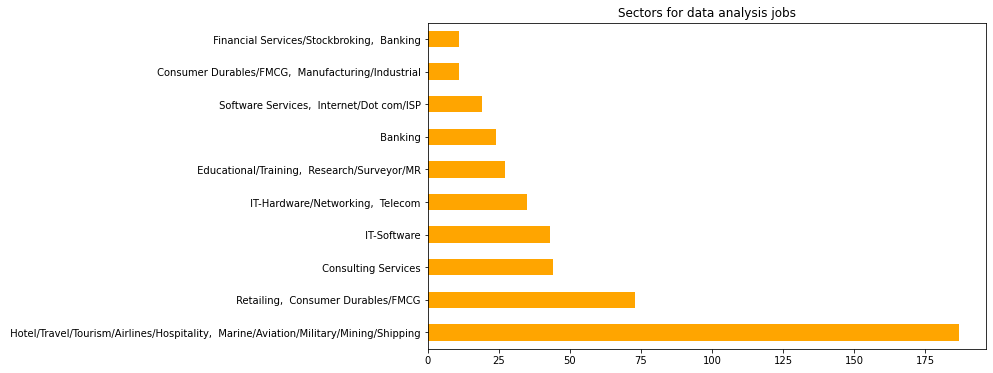

In [23]:
plt.figure(figsize=(10,6))
industries_anal.plot.barh(title = 'Sectors for data analysis jobs', color = 'Orange')

In [26]:
# type of employment in Hotel/Travel/Tourism/Airlines/Hospitality,  Marine/Aviation/Military/Mining/Shipping
# --> the industry with max of ads

analysis_data[analysis_data.Industry == ' Hotel/Travel/Tourism/Airlines/Hospitality,  Marine/Aviation/Military/Mining/Shipping']['Employment Type'].value_counts()

Full Time    187
Name: Employment Type, dtype: int64

## Skills Analysis
#### The more frequent skills in studied jobs :  

In [27]:
df['Skills'] = [i.lower() for i in df['Skills']]

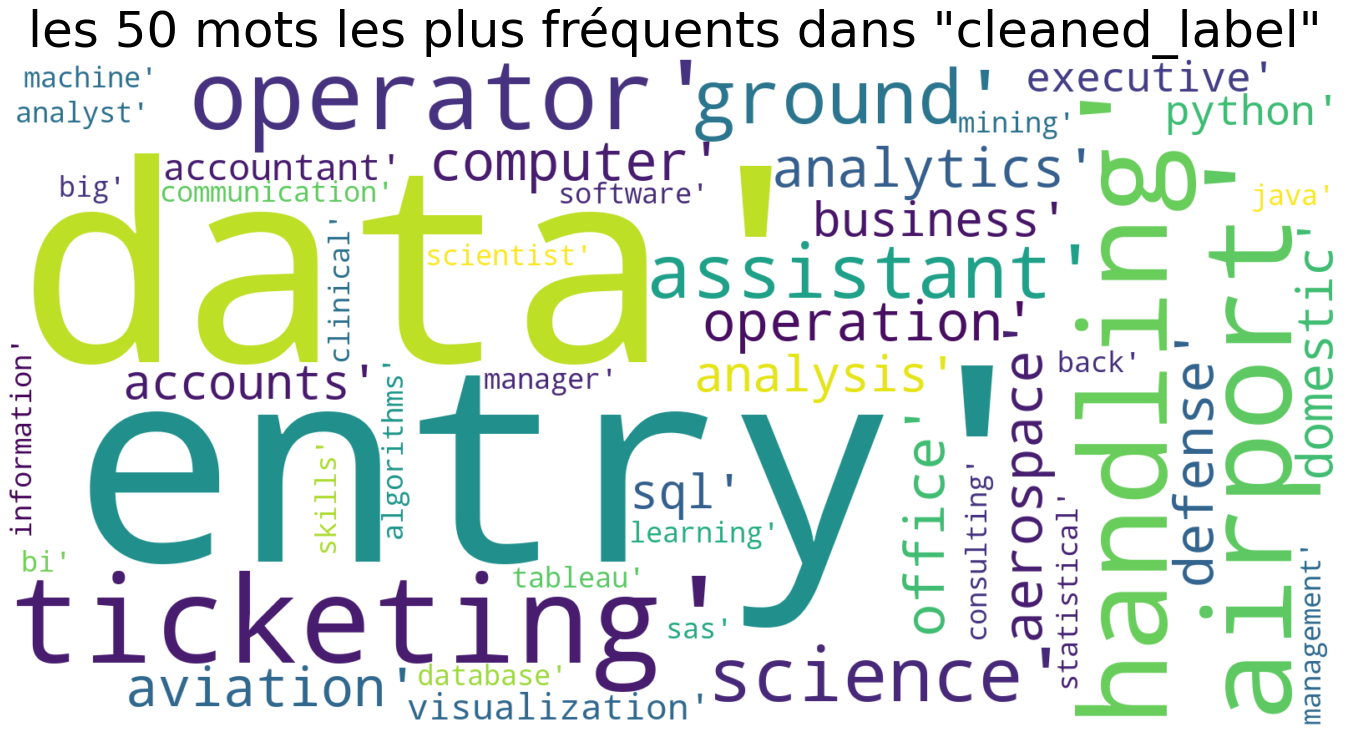

In [36]:
elts = [df['Skills'][i] for i in range(df.shape[0])]
words = word_tokenize(' '.join(elts)) 

mots_frequents = FreqDist(words).most_common(50)
wordcloud = WordCloud(width=1600, height=800, background_color='white', stopwords=STOPWORDS).generate(str(mots_frequents))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('les 50 mots les plus fréquents dans "cleaned_label"', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

## Internships Analysis

In [37]:
# types of employment in our dtaset
df['Employment Type'].value_counts().sort_values(ascending = False)

Full Time       2309
Part Time        113
Intern            43
Contractual       10
Name: Employment Type, dtype: int64

In [38]:
# add a column called "Internship" 
df['Internship'] = df['Employment Type'] == 'Intern '

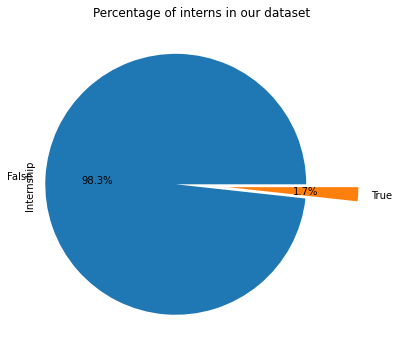

In [40]:
# percentage of interns
plt.figure(figsize=(6,6))
df['Internship'].value_counts().plot.pie(title='Percentage of interns in our dataset', 
                                              autopct='%1.1f%%', explode=(0.2, 0.2))

In [41]:
# what jobs need more interns
interns = df[df.Internship == True]['Job Function'].value_counts().sort_values(ascending = False)
interns

 Software Products & Services                                          36
 Pune                                                                   4
 Accounting/Tax/Company Secretary/Audit,Marketing/MR/Media Planning     3
Name: Job Function, dtype: int64

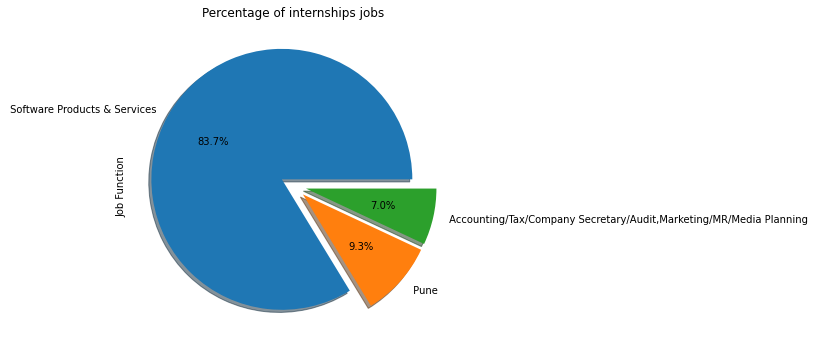

In [42]:
plt.figure(figsize=(6,6))
interns.plot.pie( title='Percentage of internships jobs', 
                   autopct='%1.1f%%', explode=(0.1, 0.1, 0.1), shadow = True)

#### Interns which depend on Data Science skills

In [43]:
# define and add "data science in skills" column
def DS(elt) :
    if 'data science' in elt :
        return True
    return False

df['Data Science in Skills'] = df.Skills.apply(DS)

In [45]:
pd.crosstab(df['Data Science in Skills'], df['Industry'])

Industry,Accounting-Tax/Consulting,"Accounting-Tax/Consulting, Advertising/PR/Event Management","Accounting-Tax/Consulting, Banking","Accounting-Tax/Consulting, CRM/CallCentres/BPO/ITES/Med.Trans","Accounting-Tax/Consulting, Consumer Durables/FMCG","Accounting-Tax/Consulting, Educational/Training","Accounting-Tax/Consulting, Financial Services/Stockbroking","Accounting-Tax/Consulting, IT-Software","Accounting-Tax/Consulting, Others - data entry","Accounting-Tax/Consulting, Retailing",Accounting/Tax/Company Secretary/Audit,Administration,Advertising/PR/Event Management,"Advertising/PR/Event Management, Entertainment/Media","Advertising/PR/Event Management, Telecom",Agriculture/Forestry/Fishing,"Agriculture/Forestry/Fishing, Manufacturing/Industrial",Apparel/Garments,"Apparel/Garments, Consumer Durables/FMCG",Architecture/Interior Design,"Architecture/Interior Design, Construction/Cement/Metal/Steel/Iron",Automobiles/Auto Component/Auto Ancillary,"Automobiles/Auto Component/Auto Ancillary, Construction/Cement/Metal/Steel/Iron","Automobiles/Auto Component/Auto Ancillary, Engineering/Projects","Automobiles/Auto Component/Auto Ancillary, Logistics/Freight Forward/Distribution/Courier","Automobiles/Auto Component/Auto Ancillary, Manufacturing/Industrial",Banking,"Banking, Financial Services/Stockbroking","Banking, Government Sector","Banking, Hotel/Travel/Tourism/Airlines/Hospitality","Banking, Insurance","Banking, Security/Law Enforcement","Banking, Warehousing",Biotechnology/Pharmaceutical/Medicine,"Biotechnology/Pharmaceutical/Medicine, Healthcare","Biotechnology/Pharmaceutical/Medicine, Manufacturing/Industrial",CRM/CallCentres/BPO/ITES/Med.Trans,"CRM/CallCentres/BPO/ITES/Med.Trans, Consulting Services","CRM/CallCentres/BPO/ITES/Med.Trans, Defence","CRM/CallCentres/BPO/ITES/Med.Trans, Financial Services/Stockbroking",...,"Manufacturing/Industrial, Petroleum/Oil and Gas/Power","Manufacturing/Industrial, Warehousing",NGO/Social Services,Others - Back office,Others - Chemicals,Others - Data entry,Others - Non IT Data Collection,Others - OPeration,Others - Typing,Others - back office,Others - back office operation,Others - computer operation,Others - computer operator,Others - data entry,Others - data operation,Others - internet,Others - office,Others - other Industry,Others - support,Others - typing,"Petrochemicals, Petroleum/Oil and Gas/Power",Petroleum/Oil and Gas/Power,"Petroleum/Oil and Gas/Power, Manufacturing/Industrial","Petroleum/Oil and Gas/Power, Projects/Infrastructure/Power/Energy",Real Estate,Recruitment/Placement Agencies,"Recruitment/Placement Agencies, Consulting Services",Research/Surveyor/MR,"Research/Surveyor/MR, Software Services",Retailing,"Retailing, Consumer Durables/FMCG",Software Products & Services,Software Services,"Software Services, IT-Software","Software Services, Internet/Dot com/ISP",Teaching/Education,Telecom,"Telecom, IT-Hardware/Networking","Telecom, Software Services",Warehousing
Data Science in Skills,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,11,1,40,1,8,3,3,1,1,2,1,2,29,11,1,1,3,15,1,1,1,2,3,1,1,3,14,13,11,1,13,2,2,5,7,27,43,2,1,1,...,2,1,1,13,1,1,1,1,2,15,1,8,11,1,5,3,3,11,2,4,10,5,0,1,2,51,2,13,1,1,11,4,18,13,12,2,1,8,3,4
True,0,0,0,0,0,0,0,0,0,0,0,0,6,8,0,0,0,0,0,0,0,0,0,0,0,1,28,2,0,0,0,0,0,0,0,7,2,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,2,0,1,0,6,8,0,1,77,0,3,10,23,0,0,11,0,0


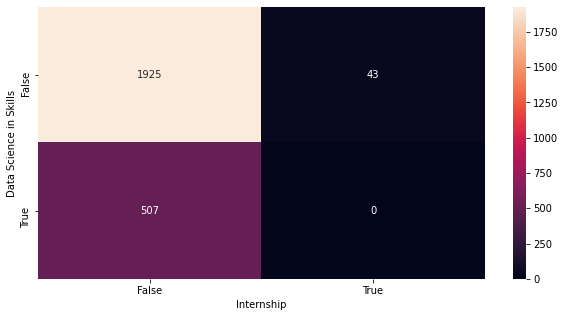

In [47]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df['Data Science in Skills'], df['Internship']), annot=True, fmt='d')